![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


**1. Perform preprocessing steps on the dataset to create dummy variables.**

In [6]:
scaler = StandardScaler()

# The DataFrame comes after the transformation
scaled_features = scaler.fit_transform(penguins_df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])

scaled_penguins_df = pd.DataFrame(scaled_features, columns=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'])

# Use 'sex'
scaled_penguins_df['sex'] = penguins_df['sex']

scaled_penguins_df = pd.get_dummies(scaled_penguins_df, columns=['sex'], drop_first=True)

scaled_penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,1
1,-0.830434,0.126187,-1.068577,-0.504847,0
2,-0.683490,0.432728,-0.426399,-1.187953,0
3,-1.344738,1.096901,-0.569105,-0.939551,0
4,-0.867170,1.761074,-0.783164,-0.691149,1


**2. Detect the optimal number of clusters for k-means clustering.**

[1410.9969879518067, 632.878768397014, 446.03107703169854, 342.4238666599881, 253.95819355644386, 213.31248773529438, 197.24170495144648, 181.66956242758351, 172.33617391148096]


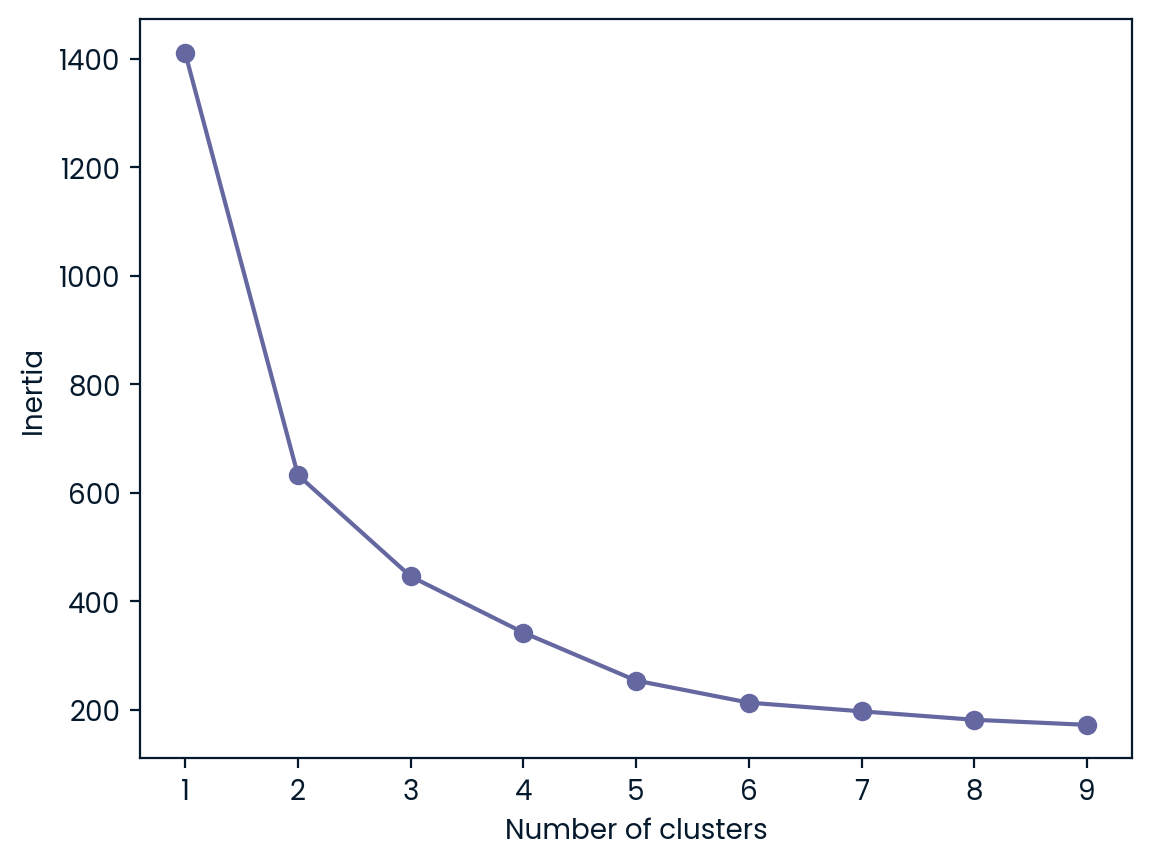

In [3]:
kmeans_list = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state= 42).fit(scaled_penguins_df)
    kmeans_list.append(kmeans.inertia_)
print(kmeans_list)
#plt.show

#Visualize the list of inertia values to determine the optimal number of clusters for the dataset, where the inertia begins to decrease more slowly.

plt.plot(range(1, 10), kmeans_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**3. Run the k-means clustering algorithm.**

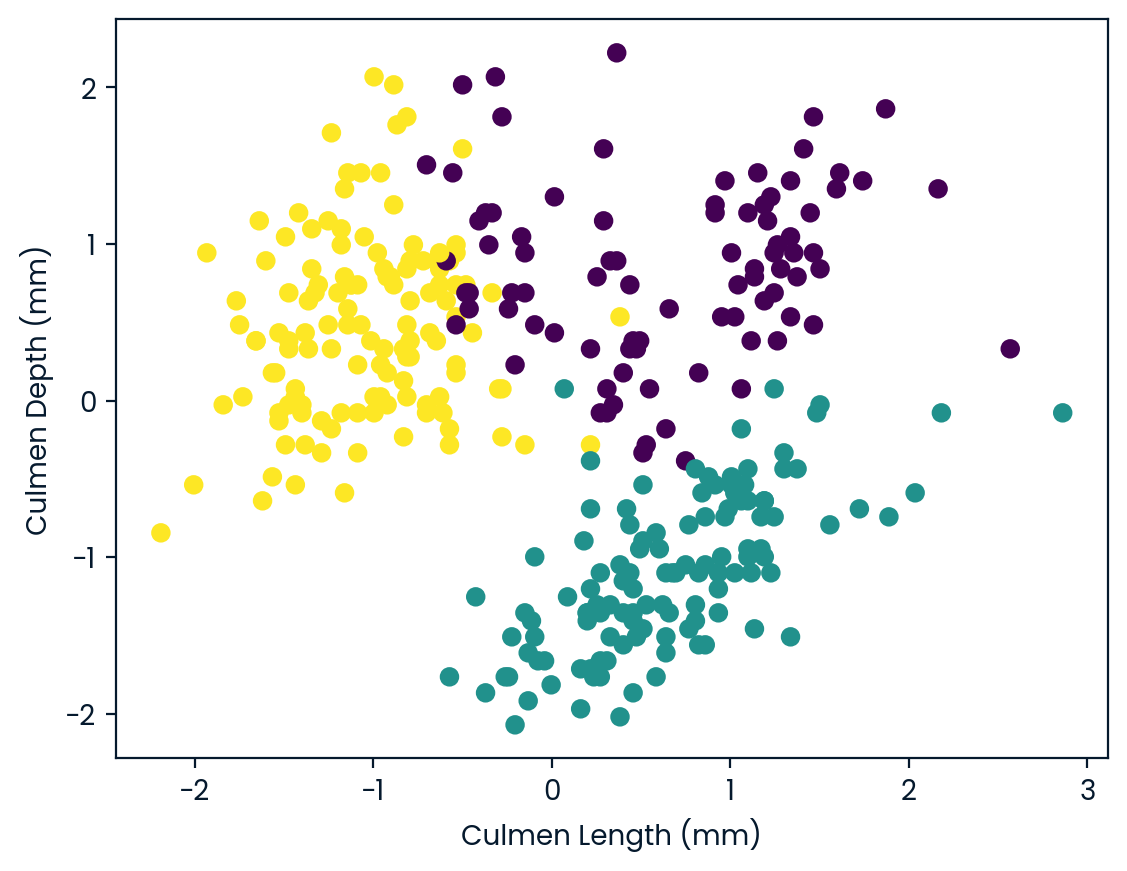

In [4]:
num_cluster = 3
kmeans = KMeans(n_clusters=num_cluster, random_state=42).fit(scaled_penguins_df)
cluster_labels = kmeans.labels_

plt.scatter(scaled_penguins_df['culmen_length_mm'], scaled_penguins_df['culmen_depth_mm'], c=cluster_labels)
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.show()

**4. Create a final statistical DataFrame for each cluster.**

In [5]:
#numeric_columns = scaled_penguins_df.select_dtypes(include=['number']).columns

#numeric_columns_binary = [col for col in numeric_columns if scaled_penguins_df[col].nunique() > 2]

#print(numeric_columns_binary)

penguins_numeric_columns = [col for col in scaled_penguins_df.select_dtypes(include=['number']).columns if scaled_penguins_df[col].nunique() > 2]

scaled_penguins_df['label'] = kmeans.labels_

print(scaled_penguins_df)

scaled_penguins_df_column = scaled_penguins_df.groupby('label')[penguins_numeric_columns].mean().reset_index()

print(scaled_penguins_df_column)

     culmen_length_mm  culmen_depth_mm  ...  sex_MALE  label
0           -0.903906         0.790360  ...         1      2
1           -0.830434         0.126187  ...         0      2
2           -0.683490         0.432728  ...         0      2
3           -1.344738         1.096901  ...         0      2
4           -0.867170         1.761074  ...         1      2
..                ...              ...  ...       ...    ...
327          0.583904        -1.764152  ...         0      1
328          0.510432        -1.457611  ...         0      1
329          1.171681        -0.742347  ...         1      1
330          0.216543        -1.202160  ...         0      1
331          1.079841        -0.537986  ...         1      1

[332 rows x 6 columns]
   label  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0      0          0.634950         0.834915          -0.263780    -0.357539
1      1          0.651511        -1.101696           1.160157     1.100373
2      2        